In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(2023 - 4 - 9)

# ___Univariate Data___
-----------------

## ___Categorical Data___
---------------

In [2]:
# Categorical data simply classifies items into groups.

In [3]:
# Let's make some synthetic data.

In [4]:
ids = np.random.randint(62_220, 64_555, size = 5560)

In [5]:
mstat = np.random.randint(1, 9, size = 5560)

In [6]:
data = pd.DataFrame({"ID": ids, "marital_status": mstat})

In [7]:
# Marital status
# 1 - married
# 2 - widowed
# 3 - divorced
# 4 - separated
# 5 - never married
# 6 - living with partner
# 7 - refused
# 8 - don't know

In [9]:
lookup = {
    1 : "married",
    2 : "widowed",
    3 : "divorced",
    4 : "separated",
    5 : "never married",
    6 : "living with partner",
    7 : "refused",
    8 : "don't know"
}

In [10]:
# Most common way to summarize categorical data is with a frequency table.
# Divide by the total number of people and multiply by 100 to get the percentage.

pd.DataFrame({"status": lookup.values(), "count": data.marital_status.value_counts(), "percent": data.marital_status.value_counts() / 55.6},
            index = lookup.keys())

,status,count,percent
1,married,696,12.517986
2,widowed,716,12.877698
3,divorced,678,12.194245
4,separated,696,12.517986
5,never married,673,12.104317
6,living with partner,717,12.895683
7,refused,698,12.553957
8,don't know,686,12.338129


## ___Bar charts___
-----------

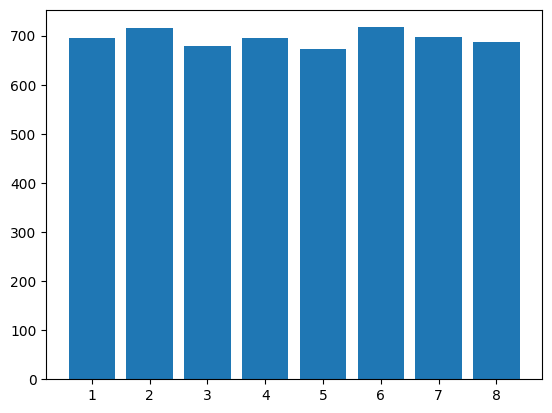

In [21]:
# Most common way to visualize categorical data is with a bar chart (Not histograms)

plt.bar(x = data.marital_status.value_counts().index, height = data.marital_status.value_counts().values)
plt.show()

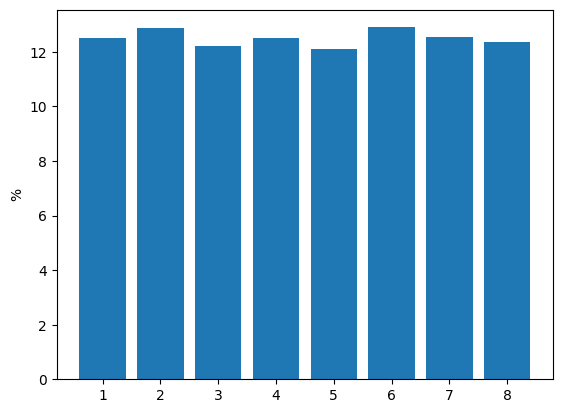

In [26]:
# Instead of counts, one cound also show the percent frequency on the y axis.

plt.bar(x = data.marital_status.value_counts().index, height = data.marital_status.value_counts().values / 5560 * 100)
plt.ylabel("%")
plt.show()

C:\Users\Anoban\AppData\Local\Temp\ipykernel_11900\701551311.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels = axes.get_xticklabels(), rotation = 90)


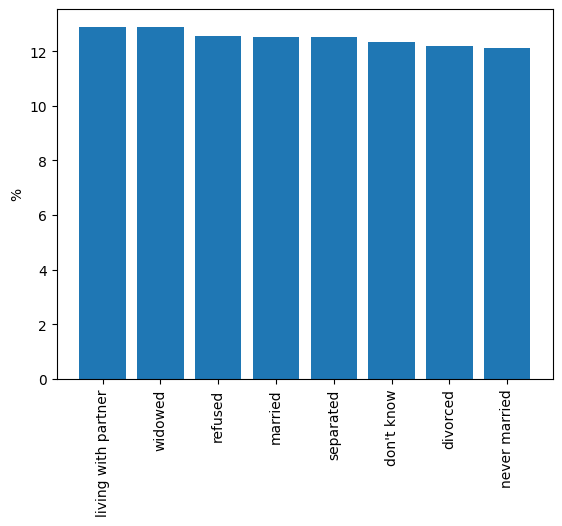

In [35]:
plt.bar(x = list(map(lambda ind: lookup.get(ind), data.marital_status.value_counts().index)),
        height = data.marital_status.value_counts().values / 5560 * 100)
axes = plt.gca()
axes.set_xticklabels(labels = axes.get_xticklabels(), rotation = 90)
plt.ylabel("%")
plt.show()

In [51]:
x_desc = list(map(lambda ind: lookup.get(ind), data.marital_status.value_counts().sort_values(ascending = False).index))
y_desc = data.marital_status.value_counts().sort_values(ascending = False).values

x_asc = list(map(lambda ind: lookup.get(ind), data.marital_status.value_counts().sort_values(ascending = True).index))
y_asc = data.marital_status.value_counts().sort_values(ascending = True).values

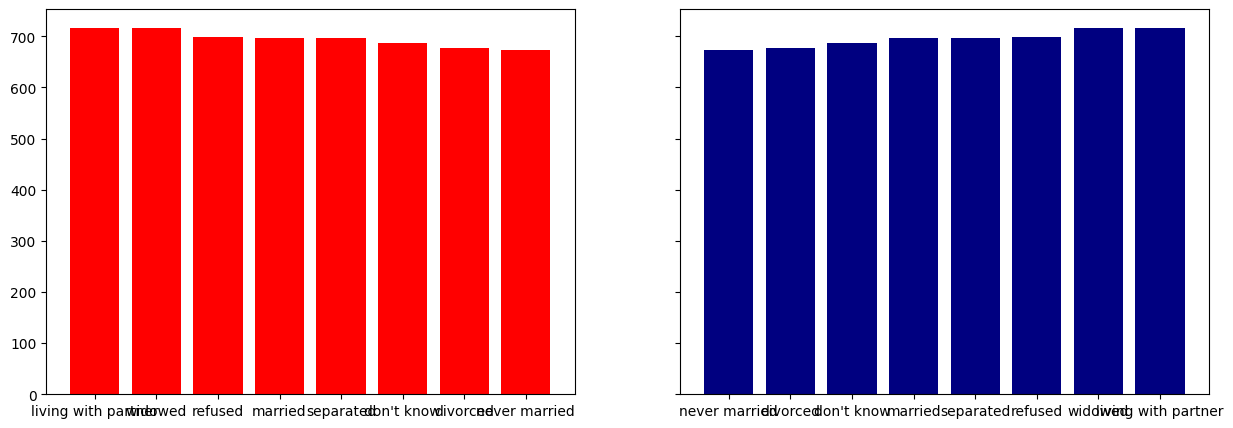

In [56]:
# With categorical nominal data, such as the marital status, one can rearrange the bars in ascending/descending orders.

fig, (axes_0, axes_1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)
fig.set_size_inches(15, 5)
axes_0.bar(x = x_desc, height = y_desc, color = "red")
axes_1.bar(x = x_asc, height = y_asc, color = "navy")

plt.show()

In [57]:
# This type of sorting will help easily discern patterns in the frequencies.

## ___Pie Charts___

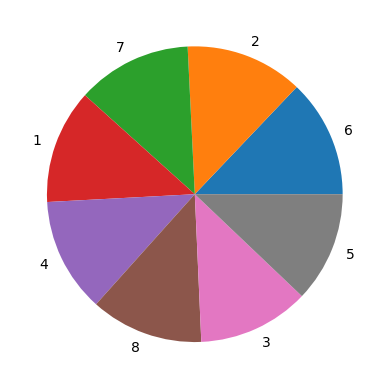

In [67]:
# Pie charts are another convenient option to represent nominal categorical variables.

plt.pie(data.marital_status.value_counts(), labels = data.marital_status.value_counts().index)
plt.show()

In [68]:
# Drawbacks of pie charts
    # Labels can overlap for piechars with many very small slices. -> makes the plot harder to read.
    # Without explicit labelling of the numerical counts of each slices, similar sized slices can be difficult to distinguish.
    # Look at the above graph for example, almost all slices look equal.

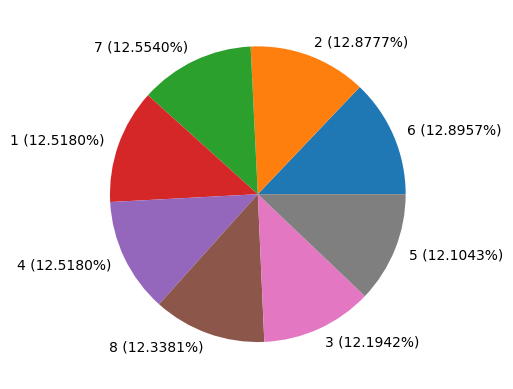

In [69]:
plt.pie(data.marital_status.value_counts(),
        labels = [ f"{ind} ({(count / 5560 * 100):.4f}%)" for (ind, count) in zip(data.marital_status.value_counts().index,
                                                                           data.marital_status.value_counts().values)])
plt.show()

# ___Wherever possible choose bar charts over pie charts!___